In [146]:
import urllib.request
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [95]:
contents = urllib.request.urlopen("http://www.gutenberg.org/cache/epub/5200/pg5200.txt").read().decode("utf-8")

In [104]:
sentences = contents.lower().replace("\r\n", " ").replace(';', ' ').replace(',', ' ').replace('?', ' ').replace('"', ' ').replace("'", ' ').replace(":", ' ').replace("*", ' ').replace("#", ' ').replace("[", ' ').replace("]", ' ').split(".")

In [113]:
# create dictionary
dictionary = []
tmp_dictionary = {}
#words_vector = new array()
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    for word in words:
        if len(word.strip()) > 0:
            if word not in tmp_dictionary:
                tmp_dictionary[word] = 0
            tmp_dictionary[word] += 1

# keep only frequent words occurences
for word in tmp_dictionary:
    if tmp_dictionary[word] > 5 and len(word) > 1:
        dictionary.append(word)
        #print(word + " - " + str(tmp_dictionary[word]))
        
print(len(dictionary))

571


In [129]:
# get vector dimensions
tmp_vector_dimensions = {}
vector_dimensions = []
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension not in tmp_vector_dimensions:
                tmp_vector_dimensions[dimension] = 0
            tmp_vector_dimensions[dimension] += 1
            prev_word = word
            
# keep only frequent dimensions occurences
for dimension in tmp_vector_dimensions:
    if tmp_vector_dimensions[dimension] > 3:
        vector_dimensions.append(dimension)

print(len(vector_dimensions))

741


In [136]:
# create vector
vector = np.zeros((len(dictionary), len(vector_dimensions)))

for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension in vector_dimensions:
                vector[i, vector_dimensions.index(dimension)] += 1

In [147]:
#reduce dimensions
pca = PCA(n_components = 2)
vector_2D = pca.fit_transform(vector)

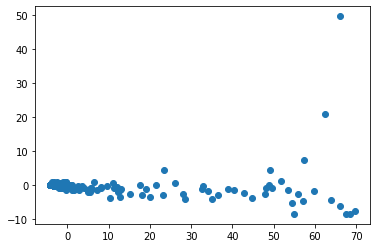

In [150]:
#plot data
plt.scatter(vector_2D[:,0], vector_2D[:,1])
plt.show()